In [60]:
# Import the Pandas library
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [61]:
# Name of the CSV files

city_df = "Pyber/city_data.csv"
ride_df = "Pyber/ride_data.csv"

In [62]:
# Read in the city data file
# Clean the city data file to remove any duplicates
# Create a new clean dataset

In [63]:
city = pd.read_csv('city_data.csv', encoding = "ISO-8859-1")

city = pd.read_csv('city_data.csv', encoding = "ISO-8859-1")

city_data_clean = pd.DataFrame({'type':city.groupby('city').first()['type'],
                                'driver_count':city.groupby('city').sum()['driver_count']}).reset_index()

city_data_clean.head()

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [64]:
city_data_clean.

SyntaxError: invalid syntax (<ipython-input-64-2a3a1654204c>, line 1)

In [65]:
# Read in the ride data file

In [66]:
ride = pd.read_csv('ride_data.csv', encoding = "ISO-8859-1")
# ride

In [67]:
# Total of all fares

In [68]:
round(ride["fare"].sum(),2)

63651.31

In [69]:
# Merge two dataframes using an inner join

In [70]:
merged_pyber_data = pd.merge(ride, city_data_clean, on="city", how="left")
#merged_pyber_data.des
merged_pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [71]:
merged_pyber_data.to_csv("merged.csv")

In [72]:
# Count the type of locations for each city

In [73]:
location_type = merged_pyber_data["type"].value_counts()

pd.DataFrame(location_type).head()

,type
Urban,1625
Suburban,625
Rural,125


In [74]:
# Count the number of cities occurances

In [75]:
city_type = merged_pyber_data["city"].value_counts()

pd.DataFrame(city_type).head()

,city
Swansonbury,34
Port Johnstad,34
Port James,32
South Louis,32
Arnoldview,31


In [76]:
# Count the number of drivers
# Not using any of this. Can get same data for ride-id
# drivercount = merged_pyber_data["driver_count"].value_counts()
# drivercount
# pd.DataFrame(drivercount).head(5)

In [77]:
# Number of drivers by city

In [78]:
countdrivers = merged_pyber_data.groupby(["city"])["driver_count"].count()

pd.DataFrame(countdrivers).head()

,driver_count
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [79]:
# Average fare per city

In [80]:
average_fare_per_city = round(merged_pyber_data.groupby(["city"]).mean()["fare"],2)

pd.DataFrame(average_fare_per_city).head()

,fare
city,
Alvarezhaven,23.93
Alyssaberg,20.61
Anitamouth,37.32
Antoniomouth,23.62
Aprilchester,21.98


In [81]:
# Total fares by city

In [82]:
total_city_fare = merged_pyber_data.groupby(["city"]).sum()["fare"]

pd.DataFrame(total_city_fare).head()

,fare
city,
Alvarezhaven,741.79
Alyssaberg,535.85
Anitamouth,335.84
Antoniomouth,519.75
Aprilchester,417.65


In [83]:
# Total fares for all cities

In [84]:
total_fare_all_cities = round(merged_pyber_data.sum()["fare"],2)

total_fare_all_cities

63651.31

In [85]:
# Total rides per city

In [86]:
total_rides_per_city = merged_pyber_data.groupby(["city"]).count()["ride_id"]

pd.DataFrame(total_rides_per_city).head()

,ride_id
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [87]:
# Unique city types
uniquetypecity = merged_pyber_data["type"].unique()
pd.DataFrame(uniquetypecity).head()

,0
0,Urban
1,Suburban
2,Rural


In [88]:
# Sum of unique city rides
uniquecityrides = merged_pyber_data["type"].count()
uniquecityrides

2375

In [89]:
# Cities by type

In [90]:
typecity = merged_pyber_data.groupby("city")["type"].unique()

pd.DataFrame(typecity).head()

,type
city,
Alvarezhaven,[Urban]
Alyssaberg,[Urban]
Anitamouth,[Suburban]
Antoniomouth,[Urban]
Aprilchester,[Urban]


In [91]:
driver_type = merged_pyber_data.groupby(["city"])["driver_count"].count()
driver_type.sum()
pd.DataFrame(driver_type).head()


,driver_count
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [92]:
# Create bubble plot dataframe

In [93]:
# Working!!! - other_stuff = pd.DataFrame({"Average Fare":average_fare_per_city, "Rides Per City":total_rides_per_city, "Drivers per City":countdrivers}) 

bubble_plot_data = pd.DataFrame({"Type City":typecity, "Average Fare":round(average_fare_per_city,2), "Rides Per City":total_rides_per_city, "Drivers per City":countdrivers}) 

pd.DataFrame(bubble_plot_data).head()


,Average Fare,Drivers per City,Rides Per City,Type City
city,,,,
Alvarezhaven,23.93,31,31,[Urban]
Alyssaberg,20.61,26,26,[Urban]
Anitamouth,37.32,9,9,[Suburban]
Antoniomouth,23.62,22,22,[Urban]
Aprilchester,21.98,19,19,[Urban]


In [94]:
# Total fares by city type

In [95]:
fare_by_city_type = (merged_pyber_data.groupby(["type","city"])).sum()
# fare_by_city_type

In [96]:
# Total rides by city type

In [97]:
rides_by_city_type = merged_pyber_data.groupby(["type","city"])
# rides_by_city_type.sum()

In [98]:
# NOT WORKINING - % of total rides by city type
#percent_ride_by_city_type = ((rides_by_city_type/uniquecityrides))*100
#pd.DatatFrame(percent_ride_by_city_type).head()

In [99]:
# % total drivers by city
drivers_by_city_type = (merged_pyber_data.groupby("type")).sum()
driver_count = drivers_by_city_type["driver_count"]
driver_count

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [100]:
# % total fares by city types
percent_fare_by_city_type = ((fare_by_city_type/total_fare_all_cities))*100
# percent_fare_by_city_type

In [101]:
# % total fares by city types
percent_fare_by_city_type = ((fare_by_city_type/total_fare_all_cities))*100
# percent_fare_by_city_type

In [102]:
# Bubble Plot

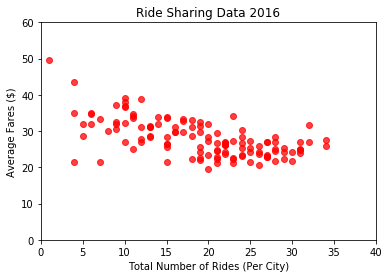

In [103]:
# The maximum x value for our chart will be 100
x_limit = 40

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
y_axis = np.arange(0, x_limit, 1)

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x = total_rides_per_city, y = average_fare_per_city, marker="o", facecolors="red", alpha=0.75)

# Set the upper and lower limits of our y axis
plt.ylim(0,60)

# Set the upper and lower limits of our x axis
plt.xlim(0,40)

# Create a title, x label, and y label for our chart
plt.title("Ride Sharing Data 2016")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

plt.show()

In [104]:
# % of total rides by city type

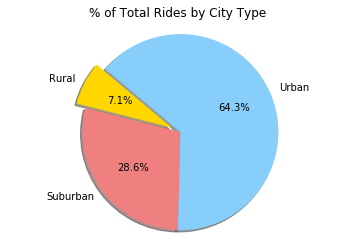

In [105]:
#rides_per_city = merged_pyber_data.groupby("type")["ride_id"].count()
#rides_per_city_df = pd.DataFrame(rides_per_city)
#rides_per_city_df = rides_per_city_df.rename(columns = {"ride_id":"Rides per city type"})
#rides_per_city_df["Rides per city type(%)"] = round(100*rides_per_city_df["Rides per city type"]/uniquecityrides,1)
#rides_per_city_df

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [5, 20, 45]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Rural" section from the others
explode = (0.1, 0, 0)

# Print the chart title
plt.title("% of Total Rides by City Type")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

In [106]:
# % of total drivers by city type

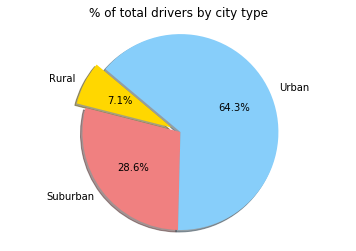

In [107]:
# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Rural" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of total drivers by city type")

plt.axis("equal")

#driver_count.plot(kind="pie", figsize=(9,9))

plt.show()

drivercount = city_data_clean["driver_count"].sum()

#drivers_per_city_type = city_data_clean.groupby("type")["driver_count"].sum()
#drivers_per_city_type_df = pd.DataFrame(drivers_per_city_type)
#drivers_per_city_type_df = drivers_per_city_type_df.rename(columns = {"driver_count":"Drivers per city type"})
#drivers_per_city_type_df["Drivers per city type(%)"] = round(100*drivers_per_city_type_df["Drivers per city type"]/drivercount,1)
#drivers_per_city_type_df


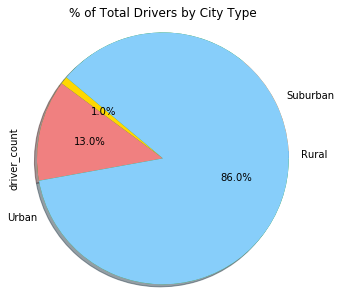

In [108]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# Create a bar chart based off of the group series from before
driver_chart = driver_count.plot(kind='pie', figsize=(5,5), labels=labels)

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Rural" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(driver_count, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title("% of Total Drivers by City Type")

# Set the xlabel and ylabel using class methods
#driver_chart.set_xlabel("% of Drivers by City Type")
#driver_chart.set_ylabel("% of Drivers by City Type")

plt.show()

In [109]:
# % of fares by City Type

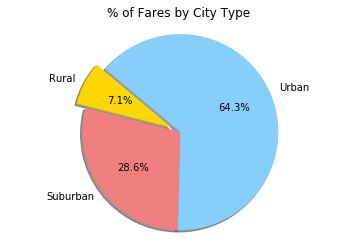

In [110]:
# Labels for the sections of our pie chart
#labels = ["Rural", "Suburban", "Urban"]

# Create a bar chart based off of the group series from before
#fare_chart = total_city_fare.plot(kind='pie', figsize=(7,7))

#fare_chart

# The colors of each section of the pie chart
#colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Rural" section from the others
#explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#plt.axis("equal")

#plt.title("% of Fares by City Type")

# Set the xlabel and ylabel using class methods
#fare_chart.set_xlabel("% of fares by City Type")
#fare_chart.set_ylabel("% of fares by City Type")

#plt.show()

#-------------------------------------------
#fare_by_city_type = merged_pyber_data.groupby("type")["fare"].sum()
#fare_by_city_type_df = pd.DataFrame(fare_by_city_type).reset_index()
#fare_by_city_type_df = fare_by_city_type_df.rename(columns ={"fare":"Total fare per city type"})
#fare_by_city_type_df["Total fare per city type(%)"] = round(100*fare_by_city_type_df["Total fare per city type"]/total_fare_all_cities,1)
#fare_by_city_type_df

# Labels for the sections of our pie chart
Labels = ["Rural", "Suburban", "Urban"]

# Create a bar chart based off of the group series from before
#fare_chart = total_city_fare.plot(kind='pie', figsize=(7,7))

#fare_chart = total_fare_per_city_type.plot(kind='pie', figsize=(7,7))

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Rural" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title("% of Fares by City Type")

# Set the xlabel and ylabel using class methods
fare_chart.set_xlabel("% of fares by City Type")
fare_chart.set_ylabel("% of fares by City Type")

plt.show()
